In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np
import math
LABELS = ['AdaBalance','SGD']# 'RMSProp', 'AdaBound','Adam','AMSGrad','AdaMod'

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
         #'axes.legend.fontsize':'medium',}
#plt.rcParams.keys()
plt.rcParams.update(params)

In [2]:
def get_data(names):
    folder_path = './curve'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

def plot(names, curve_type='train', labels = None, ylim=(50,120)):
    plt.figure()
    plt.ylim(ylim)# if curve_type == 'train' else 96)
    curve_data = get_data(names)
    for i, label in zip(curve_data.keys(),labels):
        acc = np.array(curve_data[i]['{}_loss'.format(curve_type.lower())])
        print(label,acc.min())
        # print(label,acc.max())
        
        #if label == 'AdaSmooth':
        if label == 'AdaBalance':
            plt.plot(acc, '--' ,label = label)
            # plt.plot(acc, '*' ,label = label)
            # print(curve_data.keys())
        else:
            plt.plot(acc, '-',label=label)
    
    plt.grid()
    #plt.legend(fontsize=14, loc='lower left')
    #plt.legend(fontsize=14, loc='upper right')
    plt.legend(fontsize=12, loc='upper right')
    plt.title('{} set perplexity ~ training epoch'.format(curve_type),fontsize=12,)
    #plt.title('{} set perplexity ~ {}ing epoch'.format(curve_type,curve_type),fontsize=12,)
    plt.xlabel('Training Epoch',fontsize=12,)
    #plt.xlabel('{}ing Epoch'.format(curve_type),fontsize=12,)
    plt.ylabel('Perplexity',fontsize=12,)    

# 1-layer LSTM

<IPython.core.display.Javascript object>


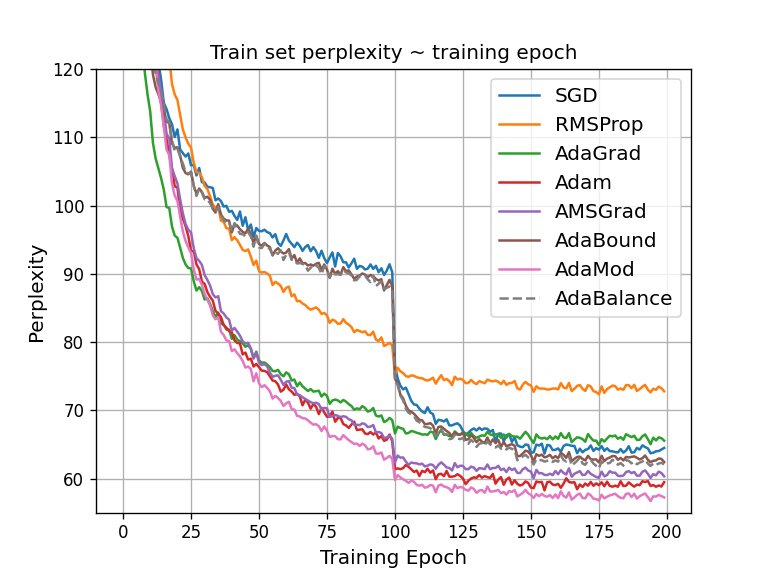

SGD 63.64590335904415
RMSProp 72.3350352755057
AdaGrad 64.90399906732257
Adam 58.26089014631774
AMSGrad 60.04599061232452
AdaBound 62.36592821178452
AdaMod 56.69294869208874
AdaBalance 61.496677828024296


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<IPython.core.display.Javascript object>


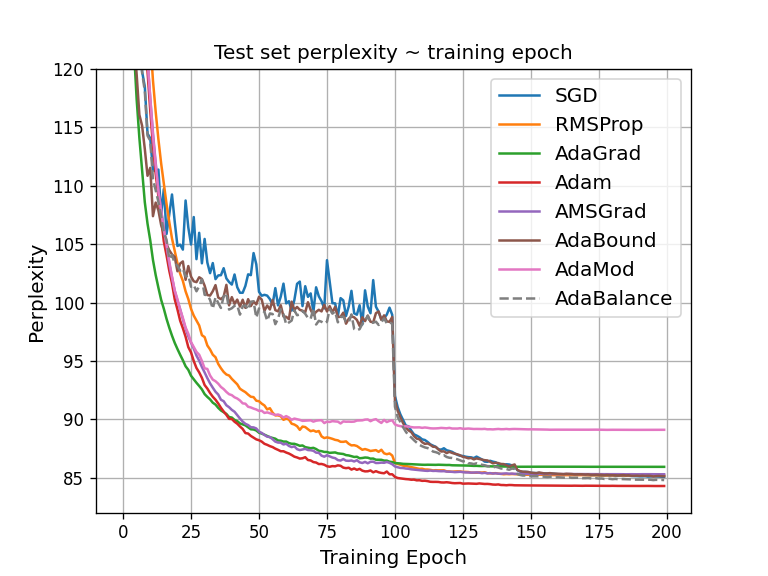

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


SGD 85.06954341671258
RMSProp 85.18091333710943
AdaGrad 85.92129472649566
Adam 84.28079140958822
AMSGrad 85.28505695781527
AdaBound 85.09534787048892
AdaMod 89.09177250246461
AdaBalance 84.78993905288084


In [3]:
names = [          
          'PTB.pt-niter-200-optimizer-sgd-nlayers1-lr30.0-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-rmsprop-nlayers1-lr0.001-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adagrad-nlayers1-lr0.1-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-amsgrad-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',      
          'PTB.pt-niter-200-optimizer-adabound-nlayers1-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamod-nlayers1-lr0.001-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabalance-nlayers1-lr0.001-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]'
        ]
labels = ['SGD',          
          'RMSProp',
          'AdaGrad',
          'Adam',
          'AMSGrad',
          'AdaBound',        
          'AdaMod',
          'AdaBalance'
        ]
plot(names, 'Train', ylim=(55,120),labels = labels)
#plt.savefig('./image/Train_lstm_1layer.png', dpi=600)
#plt.savefig('./image/Train_lstm_1layer.svg',format="svg") 
plt.savefig('./image/Train_lstm_1layer.eps',format="eps") 
plot(names, 'Test', ylim=(82,120), labels = labels)
#plt.savefig('./image/Test_lstm_1layer.png', dpi=600)
#plt.savefig('./image/Test_lstm_1layer.svg',format="svg") 
plt.savefig('./image/Test_lstm_1layer.eps',format="eps") 

# 2-layer LSTM

<IPython.core.display.Javascript object>


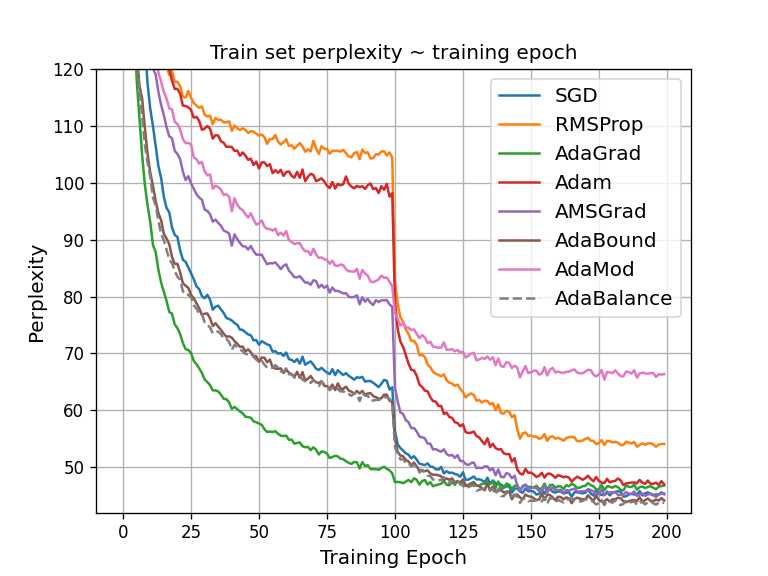

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


SGD 44.78764736974022
RMSProp 53.590644595757254
AdaGrad 45.89885285607065
Adam 46.86053749856007
AMSGrad 44.765401221042275
AdaBound 43.65230570758472
AdaMod 65.3982968333358
AdaBalance 43.321775002969666


<IPython.core.display.Javascript object>


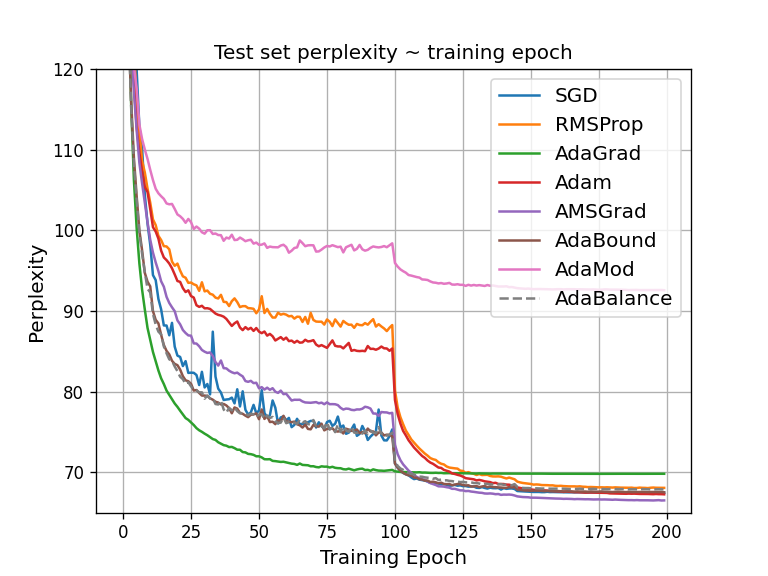

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


SGD 67.42052130321996
RMSProp 68.04284232260258
AdaGrad 69.81279373902042
Adam 67.27103485685576
AMSGrad 66.50596490060718
AdaBound 67.52585861207739
AdaMod 92.58245007483428
AdaBalance 67.87414161560223


In [4]:
names = [ 'PTB.pt-niter-200-optimizer-sgd-nlayers2-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-rmsprop-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adagrad-nlayers2-lr0.1-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-amsgrad-nlayers2-lr0.01-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabound-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamod-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',        
          'PTB.pt-niter-200-optimizer-adabalance-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]'     
        ]
labels = ['SGD',          
          'RMSProp',
          'AdaGrad',
          'Adam',
          'AMSGrad',
          'AdaBound',        
          'AdaMod',
          'AdaBalance'
        ]
plot(names, 'Train',ylim=(42,120), labels = labels)
#plt.savefig('./image/Train_lstm_2layer.png', dpi=600)
#plt.savefig('./image/Train_lstm_2layer.svg',format="svg") 
plt.savefig('./image/Train_lstm_2layer.eps',format="eps") 
plot(names, 'Test', ylim=(65,120), labels = labels)
#plt.savefig('./image/Test_lstm_2layer.png', dpi=600)
#plt.savefig('./image/Test_lstm_2layer.svg',format="svg") 
plt.savefig('./image/Test_lstm_2layer.eps',format="eps") 

# 3-layer LSTM

<IPython.core.display.Javascript object>


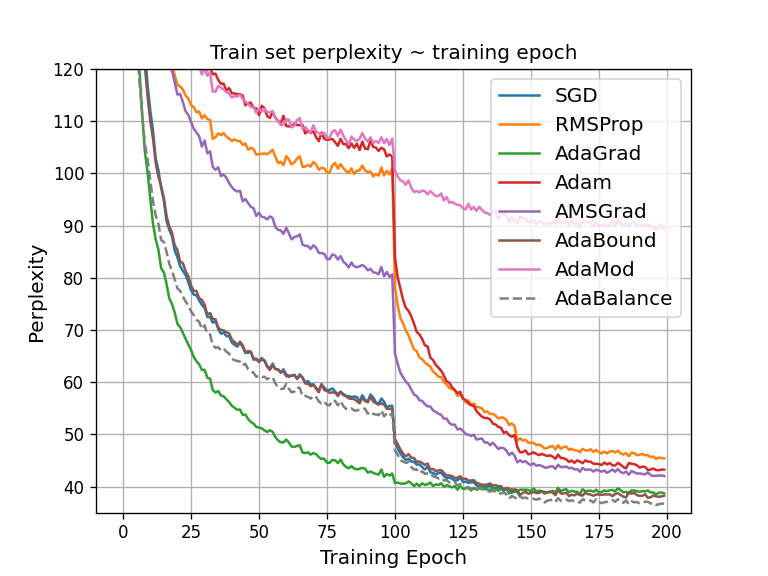

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


SGD 38.11387191427956
RMSProp 45.31424856976015
AdaGrad 38.49417368453933
Adam 43.11049536835193
AMSGrad 42.011257667533044
AdaBound 37.85284168800125
AdaMod 89.2866617135372
AdaBalance 36.46825881502667


<IPython.core.display.Javascript object>


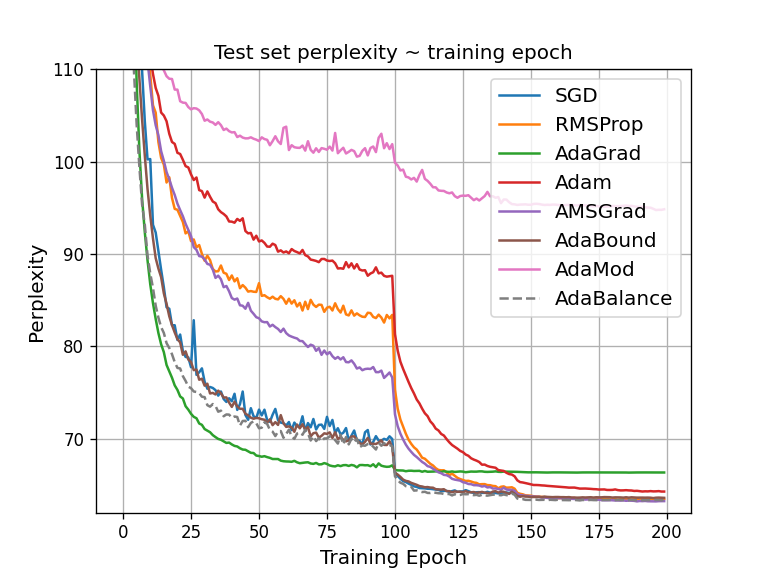

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


SGD 63.77084814991307
RMSProp 63.40418724658356
AdaGrad 66.33373107127858
Adam 64.2824498501584
AMSGrad 63.21843649931376
AdaBound 63.57787666520682
AdaMod 94.74631151414599
AdaBalance 63.31490414562606


In [5]:
names = [ 'PTB.pt-niter-200-optimizer-sgd-nlayers3-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-rmsprop-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',          
          'PTB.pt-niter-200-optimizer-adagrad-nlayers3-lr0.1-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',          
          'PTB.pt-niter-200-optimizer-amsgrad-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabound-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamod-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',         
          'PTB.pt-niter-200-optimizer-adabalance-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]'         
        ]
labels = ['SGD',          
          'RMSProp',
          'AdaGrad',
          'Adam',
          'AMSGrad',
          'AdaBound',        
          'AdaMod',
          'AdaBalance'
        ]

plot(names, 'Train',ylim=(35,120), labels = labels)
#plt.savefig('./image/Train_lstm_3layer.png', dpi=600)
#plt.savefig('./image/Train_lstm_3layer.svg',format="svg") 
plt.savefig('./image/Train_lstm_3layer.eps',format="eps") 
plot(names, 'Test', ylim=(62,110), labels = labels)
#plt.savefig('./image/Test_lstm_3layer.png', dpi=600)
#plt.savefig('./image/Test_lstm_3layer.svg',format="svg") 
plt.savefig('./image/Test_lstm_3layer.eps',format="eps") 